In [1]:
from IPython.core.debugger import set_trace

# %load_ext nb_black

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

plt.style.use(style="seaborn")
%matplotlib inline

In [2]:
#df = pd.read_csv("data/MSFT-1Y-Hourly.csv")
df=pd.read_csv("data/merged.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date                          1462 non-null   object 
 1   open                          1461 non-null   float64
 2   high                          1461 non-null   float64
 3   low                           1461 non-null   float64
 4   close                         1461 non-null   float64
 5   volume                        1461 non-null   float64
 6   close time                    1461 non-null   float64
 7   Quote asset volume            1461 non-null   float64
 8   Number of trades              1461 non-null   float64
 9   Taker buy base asset volume   1461 non-null   float64
 10  Taker buy quote asset volume  1461 non-null   float64
 11  Ignore                        1461 non-null   float64
dtypes: float64(11), object(1)
memory usage: 137.2+ KB


In [4]:
df.set_index("date", drop=True, inplace=True)

We'll use only the close feature.

In [5]:
df = df[["close"]]

In [6]:
type(df["close"]) == type(df[["close"]])

False

In [7]:
type(df[["close"]])

pandas.core.frame.DataFrame

In [8]:
df.describe()

,close
count,1461.000000
mean,14556.168884
std,14288.824617
min,3189.020000
25%,6635.650000
50%,9021.830000
75%,11945.010000
max,63575.000000


In [9]:
# plt.figure(1, figsize=(16, 6))
# _ = plt.plot(df.close)

Calculate the percentage change.

The reason for using pct_change instead of the prices is the benefit of normalization as we can measure all variables in a comparable metric. Also returns have more manageable statistical properties than prices such as stationarity, as in most cases we don't have stationary prices but we can have stationary returns.

A stationary time series is one where statistical properties such as mean, variance, correlation, etc are constant over time.
For more details on stationarity: https://en.wikipedia.org/wiki/Stationary_process

In [10]:
df["returns"] = df.close.pct_change()

In [11]:
df.head(5)

,close,returns
date,,
1.50422E+12,4834.91,NaN
1.50431E+12,4472.14,-0.075031
1.5044E+12,4509.08,0.008260
1.50448E+12,4100.11,-0.090699
1.50457E+12,4366.47,0.064964


In [12]:
print(4472.14 / 4834.91 - 1)
print((4472.14-4834.91)/4834.91)

-0.0750313863132922
-0.07503138631329219


Calculate the log returns.

Why use log returns: https://quantivity.wordpress.com/2011/02/21/why-log-returns/

In [13]:
df["log_returns"] = np.log(1 + df["returns"])

In [14]:
df.head(5)

,close,returns,log_returns
date,,,
1.50422E+12,4834.91,NaN,NaN
1.50431E+12,4472.14,-0.075031,-0.077995
1.5044E+12,4509.08,0.008260,0.008226
1.50448E+12,4100.11,-0.090699,-0.095079
1.50457E+12,4366.47,0.064964,0.062941


In [15]:
# plt.figure(1, figsize=(16, 4))
# plt.plot(df.returns)

In [16]:
# plt.figure(1, figsize=(16, 4))
# plt.plot(df.log_returns)

In [17]:
df.dropna(inplace=True) #drop NANs
X = df[["close", "log_returns"]].values
X_backup=X

In [18]:
X

array([[ 4.47214000e+03, -7.79954732e-02],
       [ 4.50908000e+03,  8.22610031e-03],
       [ 4.10011000e+03, -9.50793390e-02],
       ...,
       [ 4.87678300e+04, -2.61142577e-03],
       [ 4.69829100e+04, -3.72869556e-02],
       [ 4.71008900e+04,  2.50797825e-03]])

In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler(feature_range=(0, 1)).fit(X)
# scaler = StandardScaler().fit(X)

# X_scaled = scaler.transform(X)
# print(X_scaled.shape)
# print(X_scaled[:5])
X = scaler.transform(X)
print(X.shape)
print(X[:5])

(1460, 2)
[[0.02124864 0.60180846]
 [0.02186037 0.72401164]
 [0.01508777 0.57759523]
 [0.01949873 0.80156006]
 [0.02369341 0.79227511]]


In [20]:
# y = [x[0] for x in X_scaled]
y = [x[0] for x in X]
y_backup = [x[0] for x in X_backup]
print(len(y))
print(y[:5])

1460
[0.02124864082689392, 0.021860372225473525, 0.015087773685216334, 0.019498731328033432, 0.02369341360362124]


#### train test split

In [21]:
# split = int(len(X_scaled) * 0.8)
split = int(len(X) * 0.8)
print(split)

1168


In [22]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# X_test = X_scaled[:split]
# X_train = X_scaled[split : len(X_scaled)]
X_train = X[:split]
X_test = X[split : len(X)]
y_train = y[:split]
y_test = y[split : len(y)]

y_train_backup = y_backup[:split]
y_test_backup = y_backup[split : len(y)]



# # .StandardScaler() ->  scaler = StandardScaler().fit(X_test)
# # scaler = MinMaxScaler(feature_range=(0, 1)).fit(X_test)
# # scaler_x = MinMaxScaler(feature_range=(0, 1)).fit(X)
# scaler_x = StandardScaler().fit(X)
# X_test = scaler_x.transform(X_test)
# # scaler = MinMaxScaler(feature_range=(0, 1)).fit(X_train)
# X_train = scaler_x.transform(X_train)

# scaler_y = StandardScaler().fit(pd.DataFrame(y).values.reshape(-1, 1))
# y_test = scaler_y.transform(pd.DataFrame(y_test).values.reshape(-1, 1))
# # y_test = scaler.transform(y_test)
# # scaler = MinMaxScaler(feature_range=(0, 1)).fit(pd.DataFrame(y_train).values.reshape(-1,1))
# y_train = scaler_y.transform(pd.DataFrame(y_train).values.reshape(-1,1))

In [23]:
print(len(X_train),"==", len(y_train))
print(len(X_test),"==" ,len(y_test))

1168 == 1168
292 == 292


#### Labeling

We want to predict the stock price at a future time. We'll predict the stock price at time t + 1 relative to the stock price at time t.

As we're going to use an LSTM architecture, we know that it has memory and that it is maintained by setting the time step, basically how many steps in the past we want the LSTM to use.

The time step  refers to how many steps in time we want the backpropagation algorithm to use when calculating gradients for weight updates during testing.

So we can use a method to create both the timestep and the output variable, the t + 1.

In [24]:
n = 30
Xtrain = []
ytrain = []
Xtest = []
ytest = []

print("BEFORE")
print(type(X_train),len(X_train),type(X_train[0]),X_train[0].shape)
print(X_train[:5])
print(type(y_train),len(y_train),type(y_train[0]),y_train[0].shape)
print(pd.DataFrame(y_train[:5]))

for i in range(n, len(X_train)):
    Xtrain.append(X_train[i - n : i, : X_train.shape[1]])
    ytrain.append(y_train[i])  # predict next record
for i in range(n, len(X_test)):
    Xtest.append(X_test[i - n : i, : X_test.shape[1]])
    ytest.append(y_test[i])  # predict next record

print("AFTER DATA SEPARATION!!!!")
print(type(Xtrain),len(Xtrain),type(Xtrain[0]),Xtrain[0].shape)
print(Xtrain[0][:5],"\n")
print(Xtrain[1][:5])


print(type(ytrain),len(ytrain),type(ytrain[0]),ytrain[0].shape)
print(pd.DataFrame(ytrain[:5]))

BEFORE
<class 'numpy.ndarray'> 1168 <class 'numpy.ndarray'> (2,)
[[0.02124864 0.60180846]
 [0.02186037 0.72401164]
 [0.01508777 0.57759523]
 [0.01949873 0.80156006]
 [0.02369341 0.79227511]]
<class 'list'> 1168 <class 'numpy.float64'> ()
          0
0  0.021249
1  0.021860
2  0.015088
3  0.019499
4  0.023693
AFTER DATA SEPARATION!!!!
<class 'list'> 1138 <class 'numpy.ndarray'> (30, 2)
[[0.02124864 0.60180846]
 [0.02186037 0.72401164]
 [0.01508777 0.57759523]
 [0.01949873 0.80156006]
 [0.02369341 0.79227511]] 

[[0.02186037 0.72401164]
 [0.01508777 0.57759523]
 [0.01949873 0.80156006]
 [0.02369341 0.79227511]
 [0.02488309 0.7342231 ]]
<class 'list'> 1138 <class 'numpy.float64'> ()
          0
0  0.019723
1  0.018564
2  0.016884
3  0.018273
4  0.019541


In [25]:
print("TEST BEFORE")
print(type(X_test),len(X_test),type(X_test[0]),X_test[0].shape)
print(X_test[:5])
print(type(y_test),len(y_test),type(y_test[0]),y_test[0].shape)
print(pd.DataFrame(y_test[:5]))

print("AFTER DATA SEPARATION!!!!")
print(type(Xtest),len(Xtest),type(Xtest[0]),Xtest[0].shape)
print(Xtest[0][:5],"\n")
print(Xtest[1][:5])
print(type(ytest),len(ytest),type(ytest[0]),ytest[0].shape)
print(pd.DataFrame(ytest[:5]))

TEST BEFORE
<class 'numpy.ndarray'> 292 <class 'numpy.ndarray'> (2,)
[[0.2174624  0.71485939]
 [0.21331822 0.69045222]
 [0.21143948 0.70231158]
 [0.22396838 0.77800748]
 [0.23963112 0.79037039]]
<class 'list'> 292 <class 'numpy.float64'> ()
          0
0  0.217462
1  0.213318
2  0.211439
3  0.223968
4  0.239631
AFTER DATA SEPARATION!!!!
<class 'list'> 262 <class 'numpy.ndarray'> (30, 2)
[[0.2174624  0.71485939]
 [0.21331822 0.69045222]
 [0.21143948 0.70231158]
 [0.22396838 0.77800748]
 [0.23963112 0.79037039]] 

[[0.21331822 0.69045222]
 [0.21143948 0.70231158]
 [0.22396838 0.77800748]
 [0.23963112 0.79037039]
 [0.24156435 0.72169121]]
<class 'list'> 262 <class 'numpy.float64'> ()
          0
0  0.264730
1  0.266355
2  0.268894
3  0.300508
4  0.324713


In [26]:
df.head(5)

,close,returns,log_returns
date,,,
1.50431E+12,4472.14,-0.075031,-0.077995
1.5044E+12,4509.08,0.008260,0.008226
1.50448E+12,4100.11,-0.090699,-0.095079
1.50457E+12,4366.47,0.064964,0.062941
1.50466E+12,4619.77,0.058010,0.056390


In [27]:
val = np.array(ytrain[0])
val = np.c_[val, np.zeros(val.shape)]

In [28]:
scaler.inverse_transform(val)

array([[ 4.38000000e+03, -5.02606943e-01]])

In an LSTM network the input for each LSTM layer needs to contain the following information:
- The number of observations
- The time steps
- The features

Therefore we need to add a temporal dimension compared to a classical network:

(number of observations, number of steps, number of features per step)

In [29]:
Xtrain, ytrain = (np.array(Xtrain), np.array(ytrain))
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], Xtrain.shape[2]))

Xtest, ytest = (np.array(Xtest), np.array(ytest))
Xtest = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], Xtest.shape[2]))

In [30]:
print(Xtrain.shape)
print(ytrain.shape)
print("---")
print(Xtest.shape)
print(ytest.shape)

(1138, 30, 2)
(1138,)
---
(262, 30, 2)
(262,)


#### LSTM Model

In [31]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [32]:
callback = EarlyStopping(monitor='val_loss', patience=50)

model = Sequential()
model.add(LSTM(100, input_shape=(Xtrain.shape[1], Xtrain.shape[2]),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(20,return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer=Adam(1e-3))
history=model.fit(
    Xtrain, ytrain, epochs=250, validation_data=(Xtest, ytest), 
    batch_size=16, verbose=1, callbacks=[callback]
)

Epoch 1/250
72/72 [==============================] - 15s 89ms/step - loss: 0.0039 - val_loss: 0.1124
Epoch 2/250
72/72 [==============================] - 3s 48ms/step - loss: 0.0010 - val_loss: 0.0662
Epoch 3/250
72/72 [==============================] - 3s 47ms/step - loss: 7.4444e-04 - val_loss: 0.1072
Epoch 4/250
72/72 [==============================] - 3s 47ms/step - loss: 7.8553e-04 - val_loss: 0.0826
Epoch 5/250
72/72 [==============================] - 3s 47ms/step - loss: 6.0617e-04 - val_loss: 0.1227
Epoch 6/250
72/72 [==============================] - 3s 46ms/step - loss: 5.1075e-04 - val_loss: 0.0558
Epoch 7/250
72/72 [==============================] - 3s 47ms/step - loss: 5.1446e-04 - val_loss: 0.0713
Epoch 8/250
72/72 [==============================] - 3s 48ms/step - loss: 3.9499e-04 - val_loss: 0.0662
Epoch 9/250
72/72 [==============================] - 3s 48ms/step - loss: 3.3884e-04 - val_loss: 0.0713
Epoch 10/250
72/72 [==============================] - 3s 48ms/step - lo

72/72 [==============================] - 5s 63ms/step - loss: 1.1622e-04 - val_loss: 0.0315
Epoch 80/250
72/72 [==============================] - 4s 61ms/step - loss: 1.1121e-04 - val_loss: 0.0215
Epoch 81/250
72/72 [==============================] - 4s 54ms/step - loss: 1.0756e-04 - val_loss: 0.0286
Epoch 82/250
72/72 [==============================] - 4s 49ms/step - loss: 9.2012e-05 - val_loss: 0.0395
Epoch 83/250
72/72 [==============================] - 4s 49ms/step - loss: 1.3975e-04 - val_loss: 0.0289
Epoch 84/250
72/72 [==============================] - 4s 50ms/step - loss: 1.1083e-04 - val_loss: 0.0352
Epoch 85/250
72/72 [==============================] - 4s 49ms/step - loss: 1.1185e-04 - val_loss: 0.0102
Epoch 86/250
72/72 [==============================] - 3s 48ms/step - loss: 1.1067e-04 - val_loss: 0.0197
Epoch 87/250
72/72 [==============================] - 4s 49ms/step - loss: 9.4689e-05 - val_loss: 0.0147
Epoch 88/250
72/72 [==============================] - 3s 49ms/step -

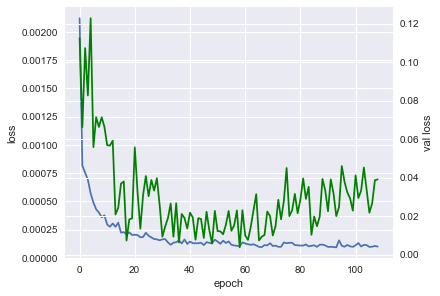

In [33]:
fig, ax1 = plt.subplots(constrained_layout=True)
ax2 = ax1.twinx()
ax1.plot(history.history['loss'], label='train')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax2.plot(history.history['val_loss'],color='green', label='val')
ax2.set_ylabel('val loss')
plt.show()

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 100)           41200     
_________________________________________________________________
dropout (Dropout)            (None, 30, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 100)           80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 100)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 30, 100)           80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 100)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 30, 50)            3

In [35]:
trainPredict = model.predict(Xtrain)
testPredict = model.predict(Xtest)

print("Xtest\n",Xtest[0][:3],"\n")
print("Xtest\n",Xtest[1][:3],"\n")
print("ytest\n",ytest[:5])
print("ytrain\n",ytrain[:5])

print("BEFORE INVERT")
print("trainPredict",len(trainPredict),"\n",trainPredict[:5])
print("testPredict",len(testPredict),"\n",testPredict[:5])

Xtest
 [[0.2174624  0.71485939]
 [0.21331822 0.69045222]
 [0.21143948 0.70231158]] 

Xtest
 [[0.21331822 0.69045222]
 [0.21143948 0.70231158]
 [0.22396838 0.77800748]] 

ytest
 [0.26472983 0.2663552  0.26889371 0.3005085  0.32471345]
ytrain
 [0.01972279 0.01856358 0.01688422 0.01827262 0.01954063]
BEFORE INVERT
trainPredict 1138 
 [[0.02682304]
 [0.02632196]
 [0.02473218]
 [0.02259038]
 [0.0235156 ]]
testPredict 262 
 [[0.23745081]
 [0.24141648]
 [0.24221003]
 [0.24465537]
 [0.2762037 ]]


In [36]:
trainPredict = np.c_[trainPredict, np.zeros(trainPredict.shape)]
testPredict = np.c_[testPredict, np.zeros(testPredict.shape)]

In [37]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainPredict = [x[0] for x in trainPredict]

testPredict = scaler.inverse_transform(testPredict)
testPredict = [x[0] for x in testPredict]

In [38]:
print("AFTER INVERT")
print(len(Xtrain),len(Xtest))
print("real",df.close.shape,"\n",df.close[:5])
print("trainPredict",len(trainPredict),trainPredict[:5])
print("testPredict",len(testPredict),testPredict[:10])
# print("targetY",len(scaler.inverse_transform(y_test)),scaler.inverse_transform(y_test)[:5])
# real_test = np.c_[y_test, np.zeros(len(y_test))]
# real_test=scaler.inverse_transform(real_test)
# real_test=real_test.T.tolist()[0]

real_test=y_test_backup
# print("targetY",len(scaler.inverse_transform(real_test)))
print("real_test",len(real_test),real_test[:10])
d = {"real":real_test,"pred":(list(np.zeros(n))+testPredict)}
# df = pd.DataFrame(data=d)
out=pd.DataFrame(data=d)
out.to_csv("vamoa.csv")

AFTER INVERT
1138 262
real (1460,) 
 date
1.50431E+12    4472.14
1.5044E+12     4509.08
1.50448E+12    4100.11
1.50457E+12    4366.47
1.50466E+12    4619.77
Name: close, dtype: float64
trainPredict 1138 [4808.755337938816, 4778.49704971239, 4682.49669824265, 4553.1624696102745, 4609.032369273604]
testPredict 262 [17527.7197601825, 17767.190981590153, 17815.110060937404, 17962.77432272434, 19867.850618585348, 20962.175396081806, 20920.843008078336, 21702.969413734078, 21135.17682383299, 20570.772960653307]
real_test 292 [16320.7, 16070.45, 15957.0, 16713.57, 17659.38, 17776.12, 17802.82, 18655.67, 18703.8, 18414.43]


range(1168, 1430)


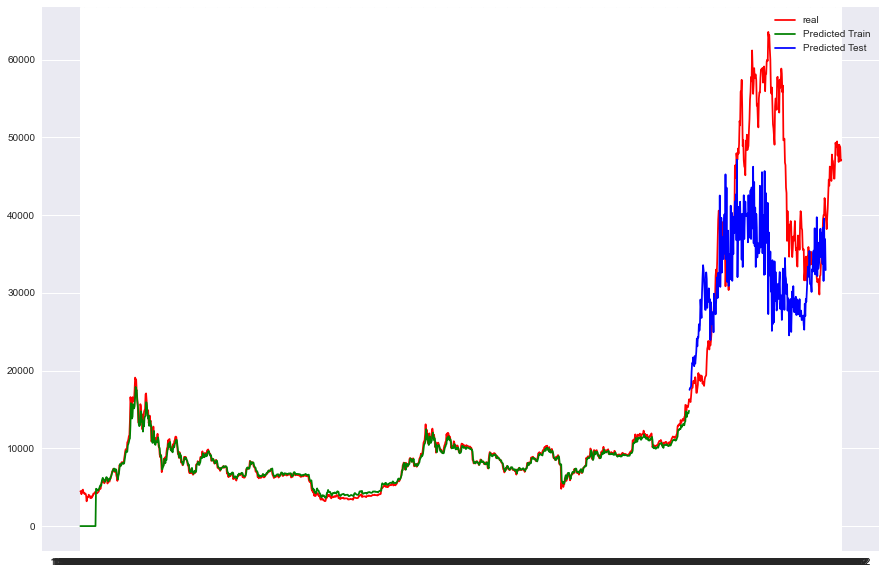

In [39]:
print(range(len(trainPredict)+n,len(trainPredict)+len(testPredict)+n))

fig, ax = plt.subplots(figsize=(15,10))
plt.plot(df.close,color='red', label="real")
plt.plot(list(np.zeros(n))+(trainPredict),color='green', label="Predicted Train")
ax.plot(range(len(trainPredict)+n,
              len(trainPredict)+len(testPredict)+n),
              testPredict,
              color='blue',
              label='Predicted Test')
plt.legend()

#TODO so o teste

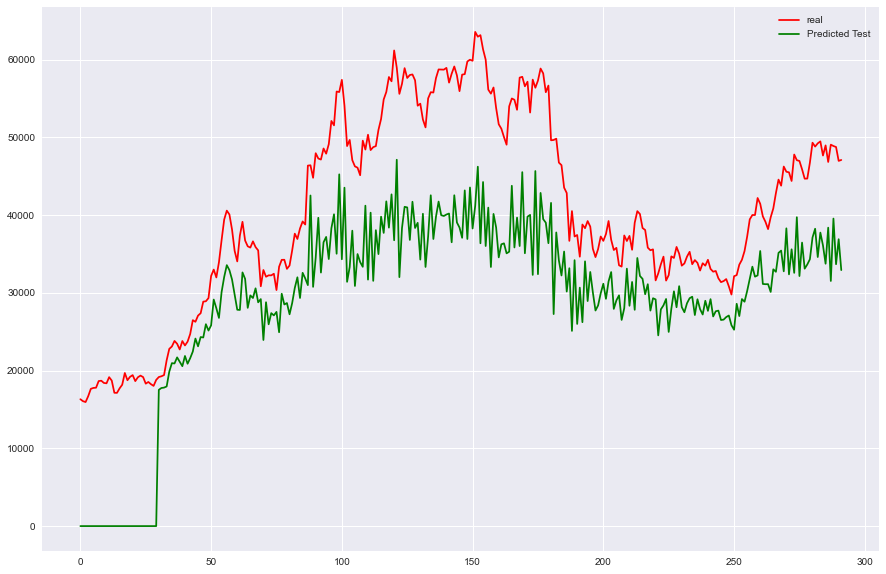

In [40]:
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(real_test,color='red', label="real")
plt.plot((list(np.zeros(n))+testPredict),color='green', label="Predicted Test")
plt.legend()

In [41]:
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

In [42]:
# print(trainPredict[:2])
# print("mean",Xtrain[0].mean(axis=0))
# print("mean",np.array(trainPredict).mean(axis=0))
# real_train = np.c_[y_train, np.zeros(len(y_train))]
# real_train = scaler.inverse_transform(real_train)
# real_train=real_train.T.tolist()[0]
real_train=y_train_backup
# print(real_train[n:,0].shape,len(trainPredict))
# print(real_train[n:,0][:5])
trainScore = mean_squared_error(real_train[n:], trainPredict, squared=False)
print("train Score: %.2f RMSE" % (trainScore))

testScore = mean_squared_error(real_test[n:], testPredict, squared=False)
print("Test Score: %.2f RMSE" % (testScore))

# trainScore = mean_squared_error([x[0][0] for x in Xtrain], trainPredict, squared=False)
# print("train Score: %.2f RMSE" % (trainScore))

# testScore = mean_squared_error([x[0][0] for x in Xtest], testPredict, squared=False)
# print("Test Score: %.2f RMSE" % (testScore))

train Score: 485.76 RMSE
Test Score: 11930.65 RMSE


In [43]:
df2=pd.read_csv("data/eth.csv")
df2.set_index("date", drop=True, inplace=True)
df2 = df2[["close"]]
df2["returns"] = df2.close.pct_change()
df2["log_returns"] = np.log(1 + df2["returns"])
df2.dropna(inplace=True) #drop NANs

X2 = df2[["close", "log_returns"]].values
X_backup2=X2
# print(X2.shape)
scaler2 = MinMaxScaler(feature_range=(0, 1)).fit(X2)
# scaler2 = StandardScaler().fit(X2)
X2 = scaler2.transform(X2)
y2 = [x[0] for x in X2]
y_backup2 = [x[0] for x in X_backup2]

#DATA SEPARATION
Xtest2 = []
ytest2 = []
for i in range(n, len(X2)):
    Xtest2.append(X2[i - n : i, : X2.shape[1]])
    ytest2.append(y2[i])  # predict next record

Xtest2, ytest2 = (np.array(Xtest2), np.array(ytest2))
Xtest2 = np.reshape(Xtest2, (Xtest2.shape[0], Xtest2.shape[1], Xtest2.shape[2]))
# print(Xtest2.shape)
Predict2 = model.predict(Xtest2)
Predict2 = np.c_[Predict2, np.zeros(Predict2.shape)]

Predict2 = scaler2.inverse_transform(Predict2)
Predict2 = [x[0] for x in Predict2]

# real_test2 = np.c_[ytest2, np.zeros(len(ytest2))]
# real_test2 = scaler2.inverse_transform(real_test2)
# real_test2 = real_test2.T.tolist()[0]
real_test2=y_backup2
# print(type(real_test2),len(real_test2),type(Predict2),len(Predict2))
# print("targetY",len(scaler2.inverse_transform(real_test2)),real_test2[:10])
d2 = {"real":real_test2[n:],"pred":Predict2}
out2=pd.DataFrame(data=d2)
out2.to_csv("vamoa2.csv")

print("BTC Train Score: %.2f RMSE" % (trainScore))
print("BTC Test Score: %.2f RMSE" % (testScore))

testScoreEth = mean_squared_error(real_test2[n:], Predict2, squared=False)
print("ETH Test Score: %.2f RMSE" % (testScoreEth))

BTC Train Score: 485.76 RMSE
BTC Test Score: 11930.65 RMSE
ETH Test Score: 234.90 RMSE


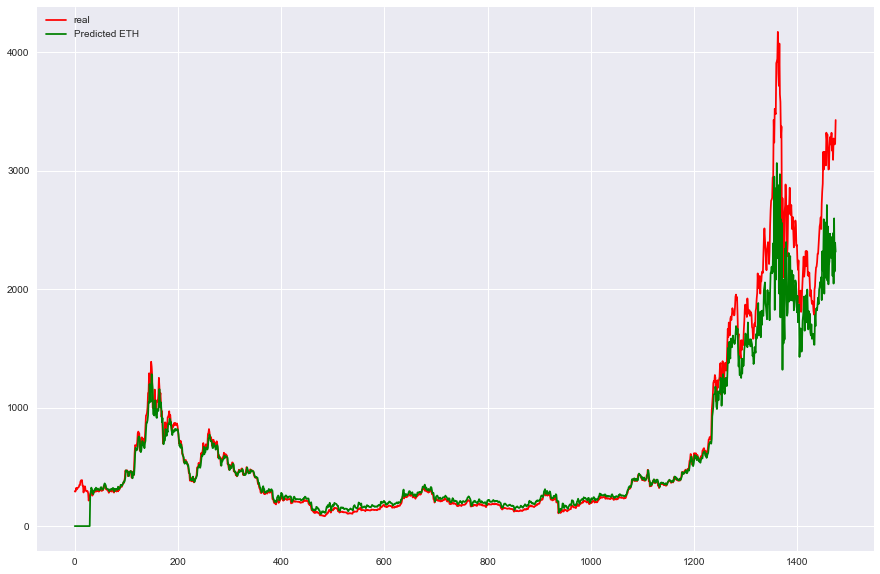

In [44]:
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(real_test2,color='red', label="real")
plt.plot((list(np.zeros(n))+Predict2),color='green', label="Predicted ETH")
plt.legend()